<a href="https://colab.research.google.com/github/ericchu2595/Unit3MiniProject/blob/main/Unit3_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By Eric Chu

## Task 1: Envirionment Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
from datetime import datetime

## Task 2: Data Collection

In [2]:
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

--2021-01-21 18:02:35--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38599872 (37M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]  36.81M  63.1MB/s    in 0.6s    

2021-01-21 18:02:36 (63.1 MB/s) - ‘us-counties.csv’ saved [38599872/38599872]



In [3]:
# Defines the counties dataset

df_counties = pd.read_csv('us-counties.csv')

In [4]:
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

--2021-01-21 18:02:37--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604553 (590K) [text/plain]
Saving to: ‘us-states.csv’

us-states.csv       100%[===================>] 590.38K  --.-KB/s    in 0.05s   

2021-01-21 18:02:37 (11.3 MB/s) - ‘us-states.csv’ saved [604553/604553]



In [5]:
# Defines the states dataset

df_states = pd.read_csv('us-states.csv')

## Task 3: Data Wrangling and EDA

In [6]:
df_counties.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [7]:
df_counties.describe()

,fips,cases,deaths
count,940870.000000,9.497260e+05,929405.000000
mean,31274.960926,2.292120e+03,58.039136
std,16301.568668,1.206846e+04,464.072550
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.200000e+01,0.000000
50%,29217.000000,2.740000e+02,5.000000
75%,46101.000000,1.180000e+03,25.000000
max,78030.000000,1.038495e+06,26249.000000


The following code shows the daily change in cases and deaths in Nassau, NY.

In [8]:
# Filter for a chosen county and chosen
ny_nassau = df_counties[(df_counties['state'] == 'New York') & (df_counties['county']=='Nassau')]

# This defines the daily_cases, the amount of daily change in cases there are in Nassau
nassau_daily_cases = ny_nassau.cases.diff()
df_counties['Daily Cases'] = nassau_daily_cases

# This defines the daily_deaths, the amount of daily change in death there are in Nassau
nassau_daily_deaths = ny_nassau.deaths.diff()
df_counties['Daily Deaths'] = nassau_daily_deaths

# Filter for a chosen county and chosen
ny_nassau = df_counties[(df_counties['state'] == 'New York') & (df_counties['county']=='Nassau')]

In [9]:
ny_nassau.head(30)

,date,county,state,fips,cases,deaths,Daily Cases,Daily Deaths
564,2020-03-05,Nassau,New York,36059.0,1,0.0,NaN,NaN
626,2020-03-06,Nassau,New York,36059.0,4,0.0,3.0,0.0
714,2020-03-07,Nassau,New York,36059.0,4,0.0,0.0,0.0
819,2020-03-08,Nassau,New York,36059.0,5,0.0,1.0,0.0
946,2020-03-09,Nassau,New York,36059.0,17,0.0,12.0,0.0
1097,2020-03-10,Nassau,New York,36059.0,19,0.0,2.0,0.0
1284,2020-03-11,Nassau,New York,36059.0,28,0.0,9.0,0.0
1520,2020-03-12,Nassau,New York,36059.0,41,0.0,13.0,0.0
1813,2020-03-13,Nassau,New York,36059.0,51,0.0,10.0,0.0
2162,2020-03-14,Nassau,New York,36059.0,79,0.0,28.0,0.0


Shows the last 30 days worth of data

In [10]:
ny_nassau.tail(30)

,date,county,state,fips,cases,deaths,Daily Cases,Daily Deaths
854239,2020-12-22,Nassau,New York,36059.0,77968,2337.0,880.0,6.0
857484,2020-12-23,Nassau,New York,36059.0,78983,2346.0,1015.0,9.0
860729,2020-12-24,Nassau,New York,36059.0,80003,2354.0,1020.0,8.0
863974,2020-12-25,Nassau,New York,36059.0,81099,2356.0,1096.0,2.0
867219,2020-12-26,Nassau,New York,36059.0,82233,2359.0,1134.0,3.0
870464,2020-12-27,Nassau,New York,36059.0,83045,2363.0,812.0,4.0
873709,2020-12-28,Nassau,New York,36059.0,84044,2366.0,999.0,3.0
876954,2020-12-29,Nassau,New York,36059.0,85023,2374.0,979.0,8.0
880199,2020-12-30,Nassau,New York,36059.0,86296,2381.0,1273.0,7.0
883444,2020-12-31,Nassau,New York,36059.0,87904,2390.0,1608.0,9.0


## Exploratory Data Analysis

The following shows Nassau, New York County data about cases in relation with deaths.

In [11]:
ny_nassau['cases'].describe()

count       322.000000
mean      45888.599379
std       22660.084708
min           1.000000
25%       39854.500000
50%       43778.000000
75%       50258.750000
max      116065.000000
Name: cases, dtype: float64

Cases tend to be around 45,000

Text(0.5, 0, 'Cases')

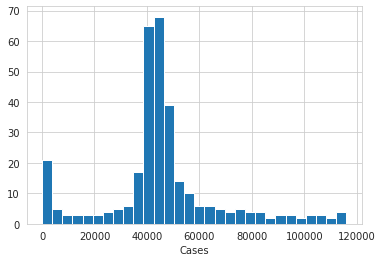

In [12]:
#sns.distplot(ny_nassau['cases'], bins= 50);
sns.set_style('whitegrid')
ny_nassau['cases'].hist(bins=30)
plt.xlabel('Cases')

# Cases vs. Deaths
The more cases there are, the more deaths there appear to be.

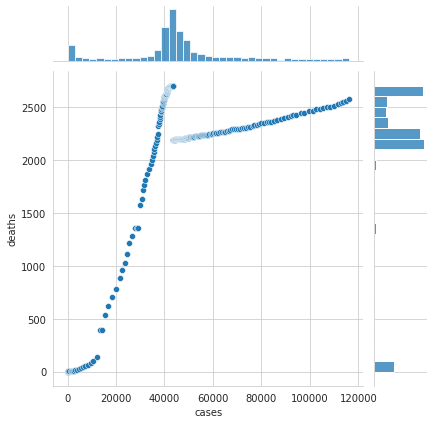

In [13]:
sns.jointplot( x = 'cases', y='deaths', data = ny_nassau)

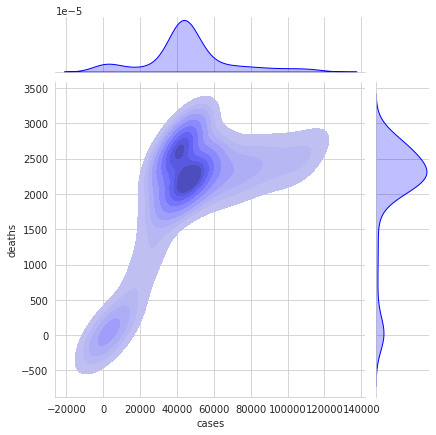

In [14]:
sns.jointplot(x='cases',y='deaths',data=ny_nassau,color='blue',kind='kde', fill = True);

# Daily Cases vs Total confirmed cases

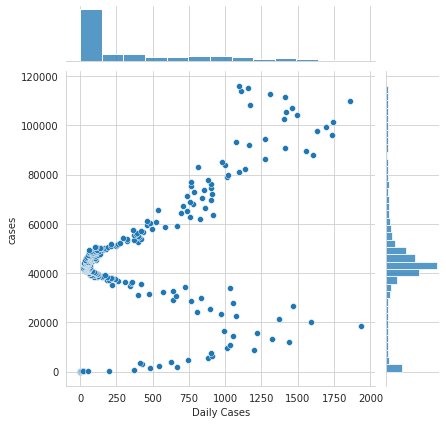

In [34]:
sns.jointplot(data=ny_nassau, x='Daily Cases', y="cases")

This graph shows us when the daily cases were peaking and when they were flat. Testing. Why is date not showing properly.

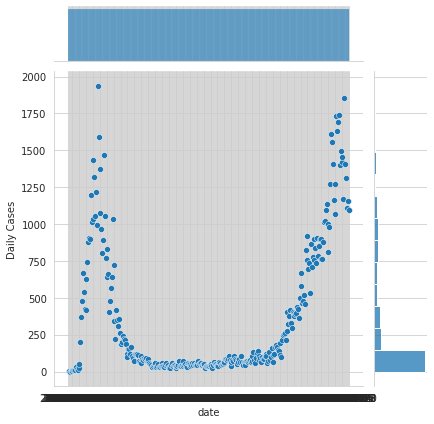

In [16]:
sns.jointplot( x = 'date', y='Daily Cases', data = ny_nassau)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

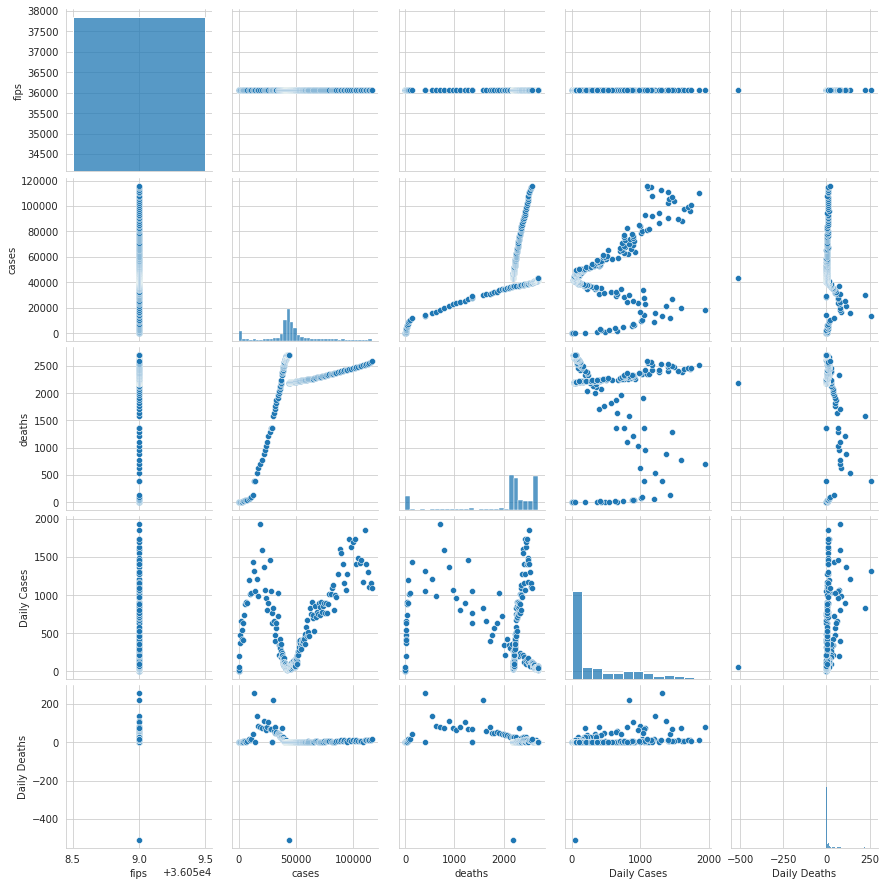

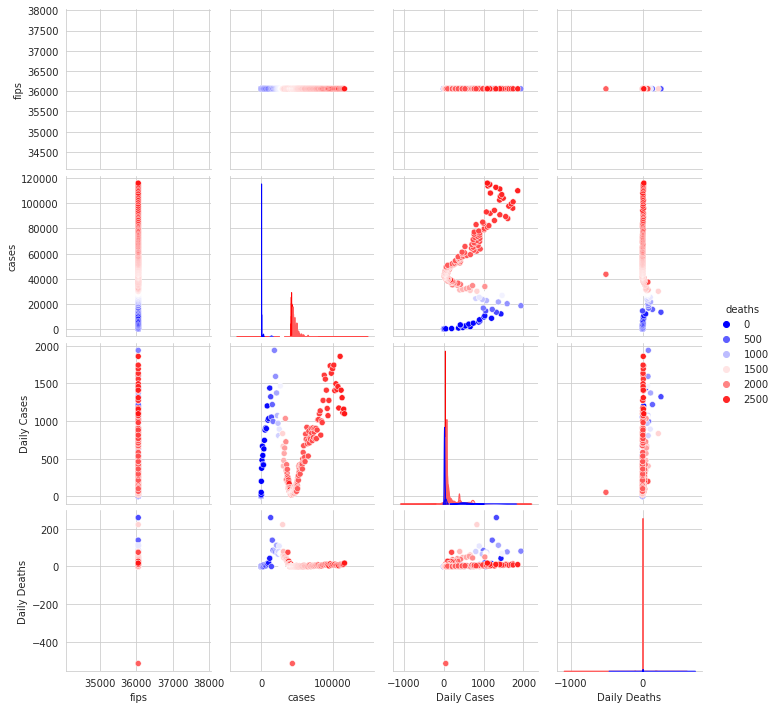

In [17]:
sns.pairplot(ny_nassau)

sns.pairplot(ny_nassau, hue = 'deaths', palette = 'bwr')

## Testing

NameError: ignored

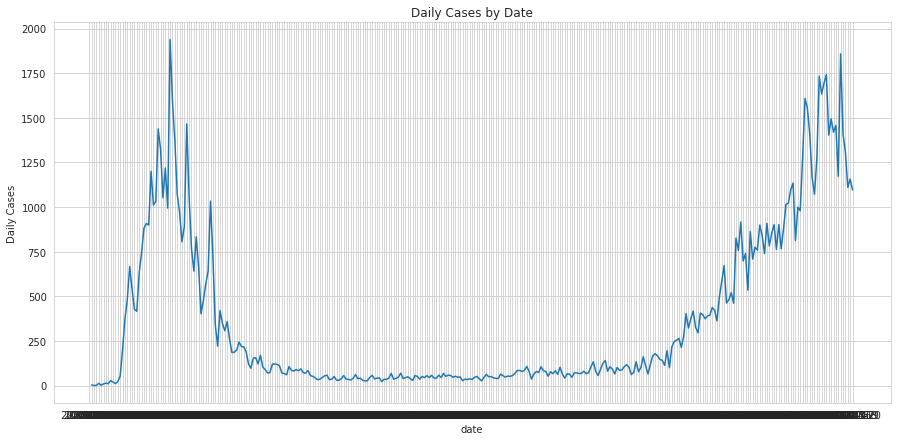

In [18]:
df_counties['date'] = pd.to_datetime(df_counties['date'], format = '%Y-%m-%d')

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='date', y='Daily Cases', data=ny_nassau).set_title('Daily Cases by Date')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Daily Cases')

# show the plot
plt.show()

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


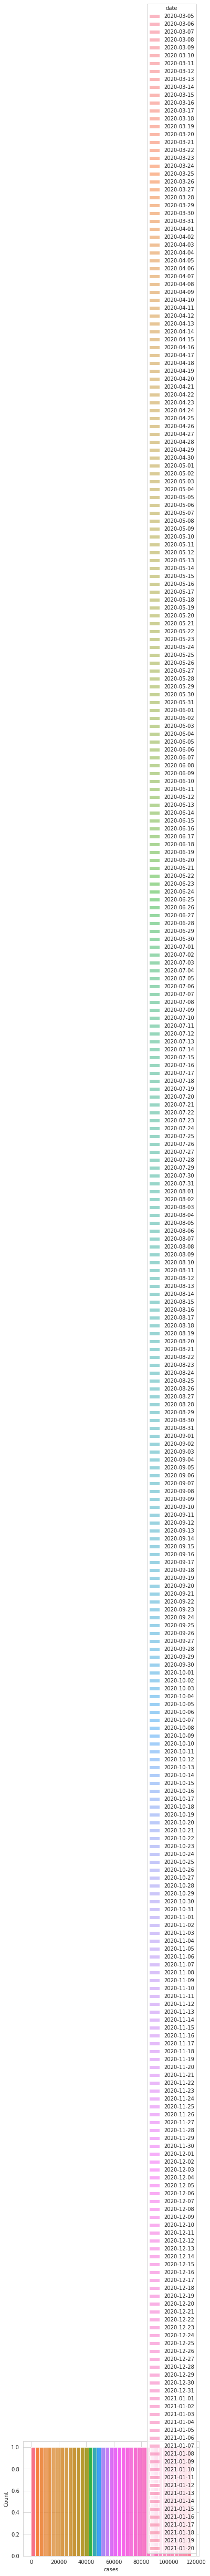

In [35]:
sns.set_style('whitegrid')
sns.histplot(data = ny_nassau, x= 'cases', hue = 'date')

In [39]:
ny_nassau['year'] = ny_nassau['date'].dt.year

AttributeError: ignored

In [37]:
# Creating a barplot for max cases in Nassau county by month
# find out how to seperate everything by month
# something about converting into datetime 
ny_nassau_deaths = sns.barplot(x = 'Month_Year', y= 'deaths', data= ny_nassau, palette = 'icefire')

plt.xticks(rotation=45, ha = 'right')

plt.show()

ValueError: ignored

## Task 5: Comparing Covid19 Data with different states

In [25]:
df_counties = pd.read_csv('us-states.csv')

In [24]:
df_counties.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [27]:
# Filter for a chosen state
ny = df_counties[(df_counties['state'] == 'New York')]

# This defines the daily_cases, the amount of daily change in cases there are in Nassau
ny_daily_cases = ny.cases.diff()
df_counties['Daily Cases'] = ny_daily_cases

# This defines the daily_deaths, the amount of daily change in death there are in Nassau
ny_daily_deaths = ny.cases.diff()
df_counties['Daily Deaths'] = ny_daily_deaths

# Filter for a chosen state
ny = df_counties[(df_counties['state'] == 'New York')]

In [28]:
ny.head(20)

,date,state,fips,cases,deaths,Daily Cases,Daily Deaths
246,2020-03-01,New York,36,1,0,NaN,NaN
261,2020-03-02,New York,36,1,0,0.0,0.0
276,2020-03-03,New York,36,2,0,1.0,1.0
293,2020-03-04,New York,36,11,0,9.0,9.0
313,2020-03-05,New York,36,22,0,11.0,11.0
338,2020-03-06,New York,36,44,0,22.0,22.0
369,2020-03-07,New York,36,89,0,45.0,45.0
404,2020-03-08,New York,36,106,0,17.0,17.0
440,2020-03-09,New York,36,142,0,36.0,36.0
478,2020-03-10,New York,36,173,0,31.0,31.0


In [29]:
# Filter for a chosen state
pa = df_counties[(df_counties['state'] == 'Pennsylvania')]

# This defines the daily_cases, the amount of daily change in cases there are in Nassau
pa_daily_cases = pa.cases.diff()
df_counties['Daily Cases'] = pa_daily_cases

# This defines the daily_deaths, the amount of daily change in death there are in Nassau
pa_daily_deaths = pa.cases.diff()
df_counties['Daily Deaths'] = pa_daily_deaths

# Filter for a chosen state
pa = df_counties[(df_counties['state'] == 'Pennsylvania')]

In [30]:
pa.head(20)

,date,state,fips,cases,deaths,Daily Cases,Daily Deaths
342,2020-03-06,Pennsylvania,42,2,0,NaN,NaN
373,2020-03-07,Pennsylvania,42,4,0,2.0,2.0
408,2020-03-08,Pennsylvania,42,6,0,2.0,2.0
445,2020-03-09,Pennsylvania,42,10,0,4.0,4.0
483,2020-03-10,Pennsylvania,42,12,0,2.0,2.0
527,2020-03-11,Pennsylvania,42,16,0,4.0,4.0
574,2020-03-12,Pennsylvania,42,22,0,6.0,6.0
624,2020-03-13,Pennsylvania,42,41,0,19.0,19.0
675,2020-03-14,Pennsylvania,42,47,0,6.0,6.0
728,2020-03-15,Pennsylvania,42,68,0,21.0,21.0


In [31]:
concatenated = pd.concat([ny.assign(dataset='set1'), pa.assign(dataset='set2')])

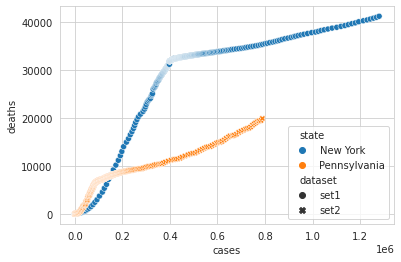

In [32]:
sns.scatterplot(x='cases', y='deaths', data=concatenated,
                hue='state', style='dataset')
plt.show()

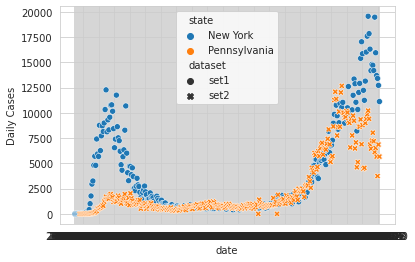

In [33]:
sns.scatterplot(x='date', y='Daily Cases', data=concatenated,
                hue='state', style='dataset')
plt.show()

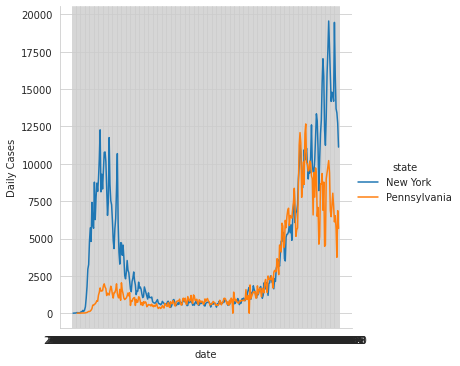

In [40]:
sns.relplot(x='date', y='Daily Cases', hue='state', kind="line", data=concatenated)

# Task 6: Conclusions

1.   New York has a higher case to death ratio than Pennsylvania
2.   There is a surge of cases and a period where the daily cases went flat cases

